In [1]:
import numpy as np
import pandas as pd
import subprocess
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import auc as auc_score, roc_auc_score, roc_curve

In [2]:
data = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'

In [3]:
!wget $data data-week-4.csv

--2025-09-19 21:40:18--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  4.77MB/s    in 0.2s    

2025-09-19 21:40:19 (4.77 MB/s) - ‘bank+marketing.zip’ saved [1023843]

--2025-09-19 21:40:19--  http://data-week-4.csv/
Resolving data-week-4.csv (data-week-4.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘data-week-4.csv’
FINISHED --2025-09-19 21:40:19--
Total wall clock time: 0.5s
Downloaded: 1 files, 1000K in 0.2s (4.77 MB/s)


In [4]:
subprocess.run(["unzip", "bank+marketing.zip"])

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


CompletedProcess(args=['unzip', 'bank+marketing.zip'], returncode=0)

In [5]:
subprocess.run(["unzip", "bank.zip"])

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


CompletedProcess(args=['unzip', 'bank.zip'], returncode=0)

In [6]:
bank_data = 'bank-full.csv'

In [7]:
df = pd.read_csv(bank_data, sep=";")

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Dataset Preparation

In [9]:
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 
           'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 
           'previous', 'poutcome', 'y']

In [10]:
df = df[columns]

In [11]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df['y'] = df['y'].map(dict(yes=1, no=0))

In [13]:
numerical = [col for col in df.dtypes[df.dtypes != 'object'].index 
                     if col != 'y']

In [14]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [16]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [17]:
len(df), len(df_train), len(df_val), len(df_test)

(45211, 27126, 9042, 9043)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

# Question 1

In [20]:
for col in numerical:
    auc = roc_auc_score(y_train, df_train[col])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
    print(f"auc: {auc:.2f}, col: {col}")

auc: 0.51, col: age
auc: 0.59, col: balance
auc: 0.53, col: day
auc: 0.81, col: duration
auc: 0.57, col: campaign
auc: 0.59, col: pdays
auc: 0.60, col: previous


# Question 2

In [21]:
dv = DictVectorizer(sparse=False)

In [22]:
train_dict = df_train.to_dict(orient='records')

In [23]:
X_train = dv.fit_transform(train_dict)

In [24]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [25]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [26]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
val_dict = df_val.to_dict(orient='records')

In [28]:
X_val = dv.transform(val_dict)

In [29]:
y_pred = model.predict_proba(X_val)[:,1]

In [30]:
y_pred

array([0.0299613 , 0.02312939, 0.02077408, ..., 0.24828544, 0.00218739,
       0.03780662], shape=(9042,))

In [31]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [32]:
auc_score(fpr, tpr)

0.9004159581551736

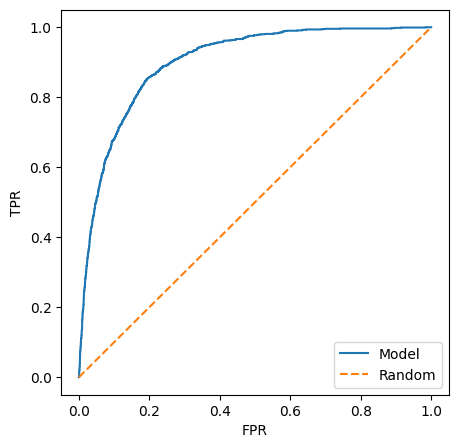

In [33]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [34]:
roc_auc_score(y_val, y_pred)

0.9004159581551736

# Question 3

In [35]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.arange(0.0, 1.0, step=0.01)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    
    return df_scores

In [36]:
df_metrics = tpr_fpr_dataframe(y_val, y_pred)

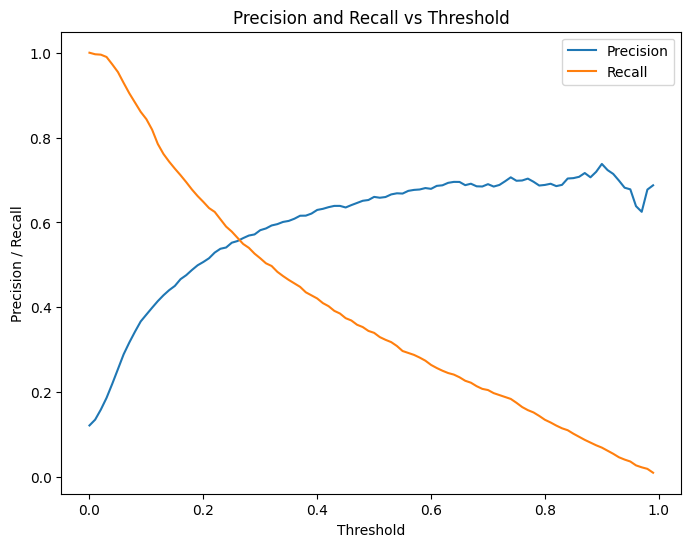

In [37]:
plt.figure(figsize=(8,6))
plt.plot(df_metrics['threshold'], df_metrics['precision'], label="Precision")
plt.plot(df_metrics['threshold'], df_metrics['recall'], label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.show()

In [38]:
df_metrics['diff'] = abs(df_metrics['precision'] - df_metrics['recall'])

In [39]:
df_metrics.sort_values(by='diff')

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,diff
26,0.26,619,494,479,7450,0.563752,0.062185,0.556155,0.563752,0.007598
27,0.27,603,468,495,7476,0.549180,0.058912,0.563025,0.549180,0.013845
25,0.25,635,515,463,7429,0.578324,0.064829,0.552174,0.578324,0.026150
28,0.28,593,449,505,7495,0.540073,0.056521,0.569098,0.540073,0.029025
29,0.29,578,433,520,7511,0.526412,0.054507,0.571711,0.526412,0.045300
...,...,...,...,...,...,...,...,...,...,...
4,0.04,1068,3800,30,4144,0.972678,0.478348,0.219392,0.972678,0.753286
3,0.03,1087,4745,11,3199,0.989982,0.597306,0.186385,0.989982,0.803596
2,0.02,1093,5789,5,2155,0.995446,0.728726,0.158820,0.995446,0.836626
1,0.01,1094,7004,4,940,0.996357,0.881672,0.135095,0.996357,0.861262


# Question 4

In [40]:
df_metrics['f1'] = 2 * ((df_metrics['precision'] * df_metrics['recall']) / (df_metrics['precision'] + df_metrics['recall']))

In [41]:
best_threshold = df_metrics.loc[df_metrics['f1'].idxmax(), 'threshold']

In [42]:
best_threshold

np.float64(0.22)

# Question 5

In [43]:
features = [col for col in columns if col != 'y']
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [44]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [45]:
def predict(df_val, dv, model):
    dicts = df_val[features].to_dict(orient='records')
    X_val = dv.fit_transform(dicts)

    y_pred = model.predict_proba(X_val)[:,1]

    return y_pred

In [46]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [47]:
scores = []
iteration = 0
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)    
    print('iter=%s, %.3f' % (iteration, auc))
    iteration += 1

iter=0, 0.899
iter=1, 0.899
iter=2, 0.911
iter=3, 0.908
iter=4, 0.912


In [48]:
np.mean(scores), np.std(scores)

(np.float64(0.9058645558975871), np.float64(0.005652844370349586))

# Question 6

In [49]:
for C in [0.000001, 0.001, 1]:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1e-06 0.701 +- 0.009
C=0.001 0.861 +- 0.007
C=1 0.906 +- 0.006
